In [46]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline


#Loading the data and setting variables for the testing and taining data

training_data = h5py.File('C:/Users/nicm9/OneDrive/Documents/AMS595/PythonHw2/train_catvnoncat.h5', "r") 
test_dataset = h5py.File('C:/Users/nicm9/OneDrive/Documents/AMS595/PythonHw2/test_catvnoncat.h5', "r")   
print(training_data.keys())
#209 images for training, x
print(training_data['train_set_x']) 
#labels for images;0 for false not a cat picture, 1 for true it is a cat picture, y
print(training_data['train_set_y']) 
#our classes, cat or not cat
print(training_data['list_classes']) 

#set our training and testing data
train_X = np.array(training_data["train_set_x"][:])
train_Y = np.array(training_data["train_set_y"][:])
test_X = np.array(test_dataset["test_set_x"][:]) 
test_Y = np.array(test_dataset["test_set_y"][:]) 
classes = np.array(test_dataset["list_classes"][:])
print(train_X.shape)
print(train_Y.shape)
print(classes.shape)
print(classes) # numpy.bytes_
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))
print(train_Y.shape)


#Training the Data
#Flatten and normalize the image

#perform linear transformation. Each pixel is between 0 and 255
train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T  
print(train_X_flat.shape)
test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T

#Define the Sigmoid Function
def sigmoid(z):
    """
    This function finds the sigmoid of z - 1(1+np.exp(-z)) 

    Arguments:
    z -- array or scalar 

    Return:
    sigmoid of z

    """
    return 1/(1+np.exp(-z))


def propagate(w, b, X, Y):
    """
    Use the cost fucntion and the gradient to do forwards and backwards propagation

    Arguments:
    w -- weight with size (resolution,resolution,3 (for color channel),1) (64,64,3,1)
    b -- bias, a scalar/the intercept
    X -- data of size (resolution,resolution,3) = (64,64,3)
    Y -- Our correct label of each picture - o for not a cat and 1 for a cat

    Return:
    dw -- gradient of the loss with respect to w, same shape as w
    db -- gradient of the loss with respect to b, same shape as b
    cost -- negative log-likelihood cost for logistic regression
    """

    m = X.shape[1] # - second dimension which is 209

    # Forward propagation
    A = sigmoid(np.dot(w.T,X) + b)
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  #Gradient of the cost function J

    # backward propagation for gradient
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m

    cost = np.squeeze(cost)

    return dw, db, cost

#Training the Data

X = train_X_flat
Y = train_Y
dim = train_X_flat.shape[0]
#initialize weight with shape (dim,1)
w = np.zeros((dim,1))
#initialize our bias - a scalar 
b = 0 
#set our number of iterations to 10000
iterations = 10000
#set our learning rate to 0.006, this along with the number of iterations should make our predictions more accurate
lr = 0.006
#print the cost every 1000 iterations, it should be getting smaller
record_cost = 1000  
costs = []

for i in range(iterations):
    dw, db, cost = propagate(w, b, X, Y)


    # gradient descent
    w = w - (lr*dw)
    b = b - (lr*db)

    # Record the costs
    if i % record_cost == 0:
        costs.append(cost)
        print (f"Cost after iteration {i} is: {cost}")

scipy.io.savemat("weights.mat", {"weights":w})
scipy.io.savemat("biases.mat", {"biases":b})

#Looking at our Results

print(test_X_flat.shape)
#accessing the information that we previously stored
w = scipy.io.loadmat('weights.mat')["weights"]
b = scipy.io.loadmat('biases.mat')["biases"]
#the shape of our weights should be the number of examples - 209, the number of pixels, the number of pixels, and the channel for the color (209,64,64,3)
print(w.shape)
#the shape of our bias should be the number of examples - 209
print(b.shape)
A = sigmoid(np.dot(w.T,test_X_flat) + b)
Y_predict_test = (A >= 0.5) * 1.0
Y_predict_train = sigmoid(np.dot(w.T,X) + b)

print(f"train accuracy: {(100 - np.mean(np.abs(Y_predict_train - train_Y)) * 100):2f}")
print(f"test accuracy: {(100 - np.mean(np.abs(Y_predict_test - test_Y)) * 100):2f}")

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">
(209, 64, 64, 3)
(209,)
(2,)
[b'non-cat' b'cat']
(1, 209)
(12288, 209)
Cost after iteration 0 is: 0.6931471805599453
Cost after iteration 1000 is: 0.189109561530962
Cost after iteration 2000 is: 0.11668662340424085
Cost after iteration 3000 is: 0.08353175113117936
Cost after iteration 4000 is: 0.06468783540438963
Cost after iteration 5000 is: 0.05260302692698633
Cost after iteration 6000 is: 0.04422470335803406
Cost after iteration 7000 is: 0.03809071118420868
Cost after iteration 8000 is: 0.03341513612329683
Cost after iteration 9000 is: 0.029738740683096596
(12288, 50)
(12288, 1)
(1, 1)
train accuracy: 97.404120
test accuracy: 70.000000


# Incorrect Predictions

The indices of the incorrect predictions are: [6, 10, 11, 13, 18, 19, 24, 28, 29, 30, 34, 41, 44, 45, 46]


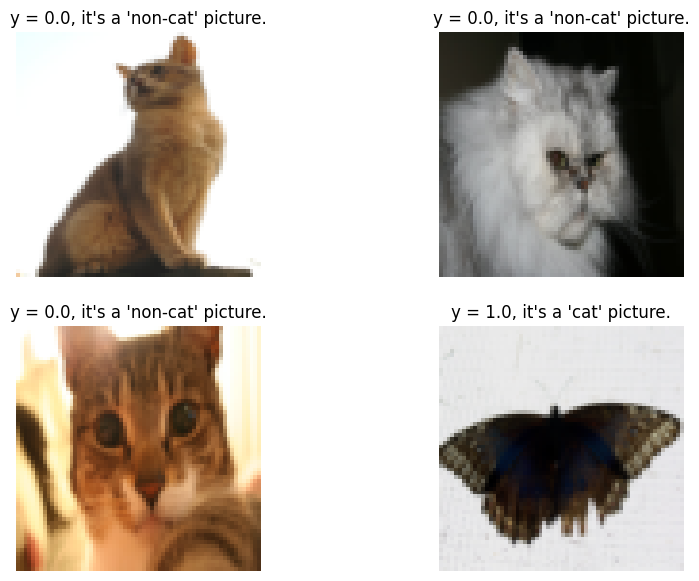

In [45]:

#We use the difference between the predicted value and the actual value of the label to see if our model predicted correctly
Diff = Y_predict_test - test_Y
Diff = Diff[0]
#initialize our array
Incorrect_Array = []

#for loop to add the indices where the predicted value does not match the actual value to our list
for i in range(len(Diff)):
    if Diff[i] != 0:
        Incorrect_Array.append(i)
print(f"The indices of the incorrect predictions are: {Incorrect_Array}")

# create figure
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
#for loop to go through the data set and print the first 4 incorrect figures
for i in range(4):
  fig.add_subplot(rows, columns, i+1) 
  plt.imshow(test_X[Incorrect_Array[i]])
  plt.axis('off')
  class_ind = Y_predict_test[:, Incorrect_Array[i]][0]
  class_ind = int(class_ind)
  plt.title("y = " + str(Y_predict_test[0, Incorrect_Array[i]]) + ", it's a '" + classes[class_ind].decode("utf-8") +  "' picture.")